# **Data Pre-processing**

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates

import numpy as np
import pandas as pd

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Global_cleaned.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,slice Type
0,34393.0,24.0,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,247547.0,3
1,727022.0,250.0,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,350131.0,3
2,693697.0,1959.0,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,100319.0,3
3,22844.0,14.0,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,231497.0,3
4,36309.0,7.0,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,197655.0,3


In [110]:
# Select relevant features for clustering
temp_X = data.drop(columns=['slice Type'])
temp_X

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34393.000000,24.000000,0.133023,0.133023,0.133023,0.133023,0.133023,0.133023,0.0,0.0,...,30.069990,30.069990,1635.0,879.0,3.278968e+09,4.135953e+09,0.000000,0.000000,0.000000,2.475470e+05
1,727022.000000,250.000000,0.001092,0.001092,0.001092,0.001092,0.001092,0.001092,0.0,0.0,...,0.000000,0.000000,68096.0,31104.0,6.108380e+08,1.659091e+09,0.079877,0.041040,0.038837,3.501310e+05
2,693697.000000,1959.000000,0.014081,0.014081,0.014081,0.014081,0.014081,0.014081,0.0,0.0,...,142.035370,71.017685,97792.0,31104.0,3.649189e+09,1.482432e+09,0.012972,0.000953,0.012019,1.003190e+05
3,22844.000000,14.000000,0.132893,0.132893,0.132893,0.132893,0.132893,0.132893,0.0,0.0,...,30.099403,30.099403,1751.0,947.0,1.882601e+08,4.396569e+08,0.000000,0.000000,0.000000,2.314970e+05
4,36309.000000,7.000000,3.521330,3.521330,3.521330,3.521330,3.521330,3.521330,0.0,0.0,...,5.111705,7.099590,4094.0,5549.0,1.094324e+09,3.441728e+09,0.000000,0.000000,0.000000,1.976550e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9895,455292.377185,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,0.0,0.0,...,2.019412,1.594339,64256.0,64896.0,1.202037e+09,1.485176e+08,0.595314,0.723920,0.032170,2.373585e+06
9896,455262.025767,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,0.0,0.0,...,2.029394,1.400239,64256.0,64896.0,1.202037e+09,1.485176e+08,0.652207,0.874332,0.028468,2.367298e+06
9897,455286.246951,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,0.0,0.0,...,2.037339,1.626468,64256.0,64896.0,1.202037e+09,1.485176e+08,0.876566,0.250007,0.041358,2.383580e+06
9898,455211.102576,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,0.0,0.0,...,1.797084,1.408035,64256.0,64896.0,1.202037e+09,1.485176e+08,0.547553,0.645027,0.027258,2.384146e+06


In [111]:
##########################################################################
X = temp_X
##########################################################################

In [112]:
y = data['slice Type']
y

0       3
1       3
2       3
3       3
4       3
       ..
9895    2
9896    2
9897    2
9898    2
9899    2
Name: slice Type, Length: 9900, dtype: int64

In [113]:
np.unique(y)

array([1, 2, 3])

In [114]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.1, random_state=42)
X_train

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
9789,664063.816584,2333.956002,1.909499,1.906140,1.904911,1.903984,1.904292,1.905542,0.0,0.0,...,1.576117,2.099850,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014995,0.001868,0.014342,2.164800e+06
7263,447462.160284,1324.999374,2.992250,1.956493,3.280499,2.137423,2.731039,2.663139,0.0,0.0,...,1.891107,1.648011,64256.0,65024.0,2.043686e+09,1.618366e+09,0.151935,0.133785,0.027020,1.028606e+06
2932,236063.418954,8202.246354,4.737295,4.477248,4.835465,4.591553,4.862110,3.644770,0.0,0.0,...,6.307335,29.118550,56960.0,64768.0,8.507672e+08,5.466176e+08,0.047971,0.020919,0.026403,1.098296e+06
9786,664062.237907,2329.564234,1.913800,1.912304,1.913908,1.913048,1.912570,1.914645,0.0,0.0,...,1.567791,2.091048,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014001,0.001637,0.012520,2.364825e+06
2270,119646.416871,5487.642188,4.935297,3.721782,3.651930,4.663535,4.554954,4.704071,0.0,0.0,...,10.956757,29.675869,56960.0,64896.0,8.507672e+08,5.466176e+08,0.043624,0.020918,0.025331,7.481369e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,637842.392373,25324.347257,0.323884,0.336725,0.325118,0.310569,0.338634,0.300003,0.0,0.0,...,28.170875,27.412806,56704.0,64896.0,2.542816e+09,3.847444e+09,0.018744,0.007810,0.027104,1.350396e+06
5191,621174.080519,18814.644336,0.249412,0.258637,0.311403,0.341875,0.244438,0.297379,0.0,0.0,...,21.678560,26.217586,56448.0,64768.0,1.845250e+09,4.388114e+08,0.021797,0.002245,0.020035,1.278613e+06
5390,613094.503112,17298.677915,0.356897,0.532837,0.374227,0.545199,0.484583,0.700138,0.0,0.0,...,22.229216,18.815246,56192.0,64768.0,1.903045e+09,5.429505e+08,0.030092,0.001415,0.029700,1.156060e+06
860,526086.000000,5976.000000,1.047937,1.047937,1.047937,1.047937,1.047937,1.047937,0.0,0.0,...,0.954256,0.954256,512.0,64240.0,7.061805e+08,2.905999e+09,0.002085,0.002085,0.000000,2.207923e+06


In [115]:
X_val

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
8432,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.771186,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05
5680,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,33.262600,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06
4767,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,34.998405,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05
9218,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,1.750682,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06
621,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,4.000331,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,664611.336644,2619.439858,1.866206,1.883590,1.868661,1.881472,1.863862,1.867791,0.0,0.0,...,1.598268,2.140264,64128.0,65024.0,4.218550e+08,1.770455e+09,0.017556,0.001885,0.019715,3.526948e+05
9155,455234.910255,194.612521,3.891595,3.613938,3.326338,3.337980,3.980882,3.215810,0.0,0.0,...,2.306333,1.497726,64256.0,64896.0,6.010938e+08,3.265196e+09,1.001778,0.405318,0.026356,1.272696e+06
594,34817.000000,7.000000,4.498744,4.498744,4.498744,4.498744,4.498744,4.498744,0.0,0.0,...,4.223401,6.223959,4094.0,5549.0,1.093752e+09,3.441352e+09,0.000000,0.000000,0.000000,9.435900e+04
5563,636911.618669,25259.810066,0.204607,0.219529,0.187462,0.190487,0.218758,0.207756,0.0,0.0,...,38.116638,44.712333,56704.0,64896.0,2.542816e+09,3.847444e+09,0.019125,0.001697,0.017450,2.071909e+06


In [116]:
y_train

9789    2
7263    2
2932    1
9786    2
2270    1
       ..
5734    1
5191    1
5390    1
860     2
7270    2
Name: slice Type, Length: 8910, dtype: int64

In [117]:
y_val

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: slice Type, Length: 990, dtype: int64

# **EDA**

## Pair Plots

In [12]:
# sns.pairplot(X)
# plt.suptitle('Pairwise Scatter Plots', y=1.02)
# plt.show()

## Heatmaps

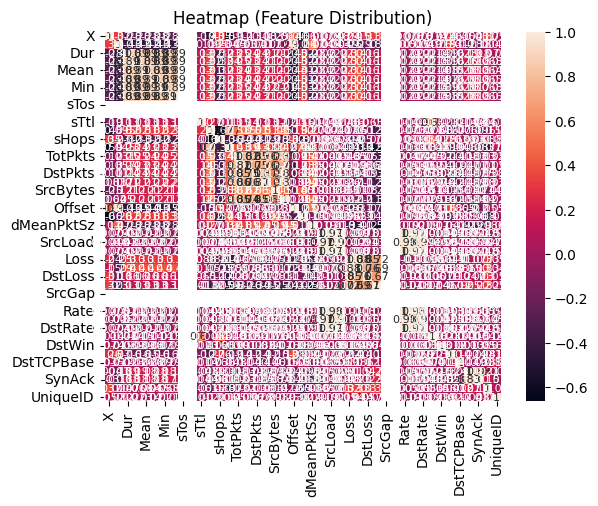

In [14]:
# Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
sns.heatmap(X_train.corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

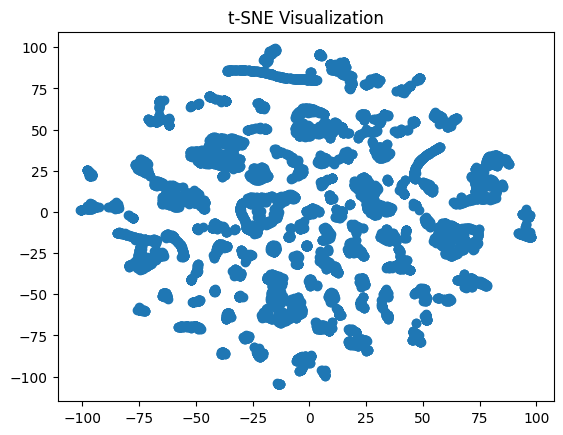

In [15]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

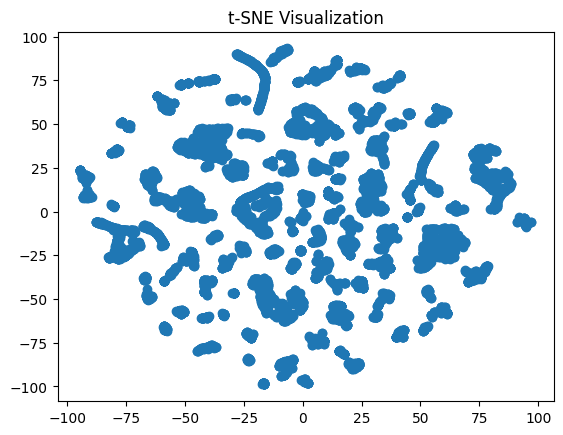

In [16]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# Plot t-SNE visualization
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

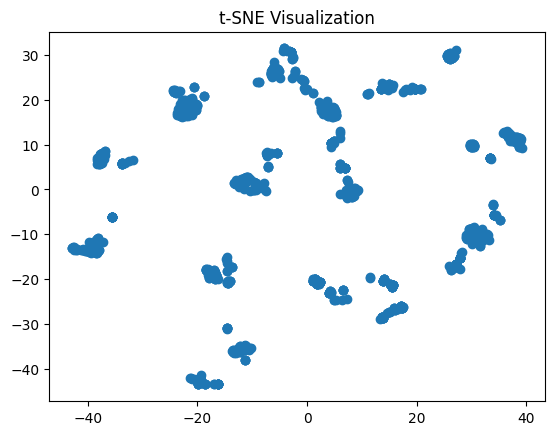

In [17]:
# Assuming 'X' is your feature matrix (shape: [n_samples, n_features])
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_val_tsne = tsne.fit_transform(X_val)
X_val_tsne

# Plot t-SNE visualization
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1])
plt.title('t-SNE Visualization')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
plt.show()

# **Optimum Cluster Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

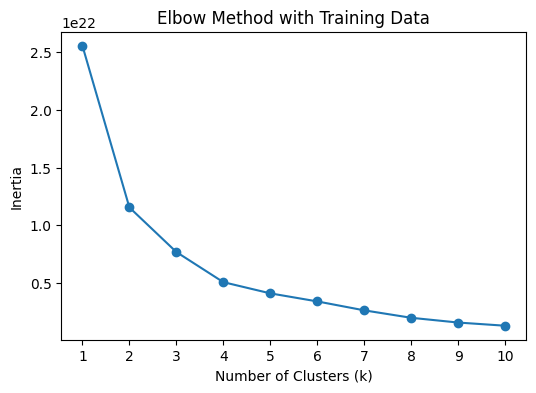

In [18]:
# Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Training Data')
plt.xticks(range(1, 11))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

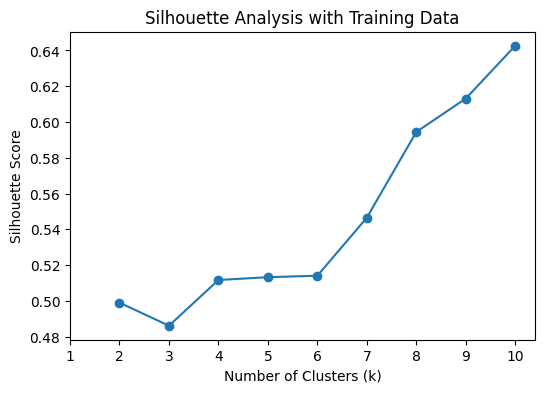

In [19]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [20]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=f7777cd95d7bafba49261665f2a8a0e2a0db0e99a72494b746231ed1e2309575
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


Optimal number of clusters: 10.0


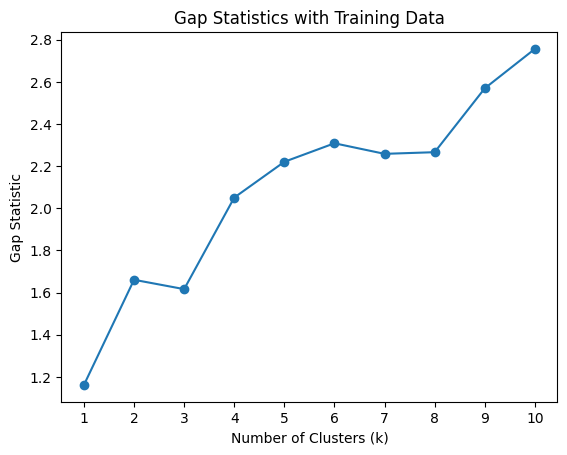

In [21]:
# Gap Statistics
from gap_statistic import OptimalK

# Define the range of cluster values to explore
cluster_range = np.arange(1, 11)
optimal_k = OptimalK(parallel_backend='joblib')
optimal_k(X_train, cluster_array=cluster_range)

n_clusters = optimal_k.gap_df.n_clusters.values[np.argmax(optimal_k.gap_df.gap_value.values)]
print("Optimal number of clusters:", n_clusters)

plt.plot(cluster_range, optimal_k.gap_df.gap_value.values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics with Training Data')
plt.xticks(range(1, 11))
plt.show()

In [22]:
optimal_k.gap_df

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,1.161768,3.814160e+20,0.005397,5.610496e+22,6.478593e+22,-0.489198,6.379051e+22
1,2.0,1.660801,5.237132e+20,0.009835,4.965955e+22,5.734510e+22,0.046659,5.572864e+22
2,3.0,1.616413,9.624390e+19,0.002270,3.923035e+22,4.529945e+22,-0.383898,4.500508e+22
3,4.0,2.050956,1.887894e+21,0.050646,3.696888e+22,4.274361e+22,-0.164977,4.219730e+22
4,5.0,2.220844,1.614713e+20,0.004911,3.379415e+22,3.902256e+22,-0.073988,3.870209e+22
5,6.0,2.308741,4.222081e+20,0.013909,3.170446e+22,3.661240e+22,0.064755,3.625973e+22
6,7.0,2.258579,4.139110e+20,0.014592,2.942400e+22,3.397927e+22,-0.002076,3.366340e+22
7,8.0,2.266419,1.524098e+20,0.005764,2.740072e+22,3.164012e+22,-0.293377,3.151950e+22
8,9.0,2.569503,2.425433e+20,0.009707,2.661598e+22,3.073477e+22,-0.181505,3.059222e+22
9,10.0,2.756595,1.325870e+20,0.005588,2.570023e+22,2.967647e+22,NaN,NaN


# **Data Modelling and Analysis**

In [118]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Fit the model to the training data
kmeans_model.fit(X_train)

# Predict the labels for the test data
y_pred = kmeans_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [119]:
y_pred

array([3, 4, 4, 9, 1, 2, 9, 3, 1, 3, 1, 8, 7, 3, 1, 0, 1, 5, 4, 6, 3, 2,
       1, 8, 5, 4, 4, 8, 8, 3, 8, 1, 1, 0, 1, 9, 4, 4, 4, 4, 0, 4, 8, 8,
       4, 4, 4, 3, 7, 0, 8, 1, 1, 6, 7, 6, 3, 0, 0, 0, 1, 7, 1, 8, 1, 4,
       2, 1, 0, 8, 1, 3, 7, 3, 0, 4, 4, 5, 4, 2, 7, 4, 1, 8, 0, 3, 5, 4,
       6, 1, 0, 0, 0, 2, 4, 7, 1, 0, 3, 0, 8, 8, 5, 0, 2, 4, 8, 8, 4, 0,
       0, 8, 1, 3, 7, 2, 3, 1, 7, 6, 4, 1, 0, 8, 8, 5, 7, 3, 0, 0, 4, 0,
       0, 1, 2, 4, 3, 4, 5, 5, 1, 9, 0, 8, 4, 4, 4, 5, 3, 4, 0, 2, 8, 3,
       8, 4, 3, 1, 3, 8, 8, 0, 9, 4, 7, 7, 4, 1, 8, 2, 8, 5, 0, 4, 0, 0,
       5, 0, 8, 0, 8, 8, 9, 8, 9, 6, 1, 1, 8, 0, 7, 8, 3, 4, 0, 0, 4, 6,
       0, 2, 0, 4, 8, 5, 2, 4, 6, 4, 3, 0, 1, 4, 4, 3, 3, 7, 3, 2, 1, 4,
       2, 2, 8, 0, 0, 1, 8, 5, 1, 3, 3, 8, 4, 1, 3, 0, 7, 1, 8, 1, 7, 6,
       1, 0, 8, 8, 3, 0, 1, 6, 4, 4, 2, 4, 5, 8, 0, 1, 8, 5, 8, 5, 2, 0,
       1, 1, 7, 8, 4, 4, 5, 5, 1, 4, 4, 8, 4, 8, 8, 7, 0, 8, 0, 4, 5, 5,
       8, 8, 3, 1, 1, 1, 4, 1, 8, 9, 4, 4, 0, 0, 8,

In [120]:
labels = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

In [121]:
labels

array([0, 6, 3, ..., 0, 1, 6], dtype=int32)

In [122]:
centroids

array([[5.64920867e+05, 1.55567623e+04, 1.43530009e+00, 1.46145498e+00,
        1.47581480e+00, 1.47992966e+00, 1.47795944e+00, 1.48816793e+00,
        0.00000000e+00, 0.00000000e+00, 6.31144814e+01, 6.54726027e+01,
        8.85518591e-01, 5.66634051e+00, 7.48251488e+01, 3.21371367e+01,
        4.44004035e+01, 6.40482833e+04, 4.24301478e+03, 5.94120329e+04,
        8.59144539e+06, 9.72588853e+01, 1.07985342e+03, 4.18211440e+05,
        2.60594969e+04, 3.93232366e+05, 1.06671597e+00, 1.73669427e-01,
        8.94990223e-01, 4.38368038e+00, 0.00000000e+00, 0.00000000e+00,
        7.23612030e+01, 3.01030962e+01, 3.95754496e+01, 6.52594599e+04,
        6.65783640e+04, 1.96893414e+09, 4.47206872e+08, 4.84730626e-02,
        2.80806477e-02, 1.95391164e-02, 1.04709325e+06],
       [3.35486969e+05, 1.71346843e+03, 3.25354118e+00, 3.25049516e+00,
        3.22753738e+00, 3.23838458e+00, 3.24607392e+00, 3.23211108e+00,
        0.00000000e+00, 0.00000000e+00, 6.37878581e+01, 8.68390177e+01,
       

In [123]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [124]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_predictions = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame for coloring
X_train_with_predictions['cluster_label'] = labels
X_train_with_predictions

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,cluster_label
9789,664063.816584,2333.956002,1.909499,1.906140,1.904911,1.903984,1.904292,1.905542,0.0,0.0,...,2.099850,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014995,0.001868,0.014342,2.164800e+06,0
7263,447462.160284,1324.999374,2.992250,1.956493,3.280499,2.137423,2.731039,2.663139,0.0,0.0,...,1.648011,64256.0,65024.0,2.043686e+09,1.618366e+09,0.151935,0.133785,0.027020,1.028606e+06,6
2932,236063.418954,8202.246354,4.737295,4.477248,4.835465,4.591553,4.862110,3.644770,0.0,0.0,...,29.118550,56960.0,64768.0,8.507672e+08,5.466176e+08,0.047971,0.020919,0.026403,1.098296e+06,3
9786,664062.237907,2329.564234,1.913800,1.912304,1.913908,1.913048,1.912570,1.914645,0.0,0.0,...,2.091048,64128.0,65024.0,2.495714e+09,2.936313e+08,0.014001,0.001637,0.012520,2.364825e+06,0
2270,119646.416871,5487.642188,4.935297,3.721782,3.651930,4.663535,4.554954,4.704071,0.0,0.0,...,29.675869,56960.0,64896.0,8.507672e+08,5.466176e+08,0.043624,0.020918,0.025331,7.481369e+05,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,637842.392373,25324.347257,0.323884,0.336725,0.325118,0.310569,0.338634,0.300003,0.0,0.0,...,27.412806,56704.0,64896.0,2.542816e+09,3.847444e+09,0.018744,0.007810,0.027104,1.350396e+06,4
5191,621174.080519,18814.644336,0.249412,0.258637,0.311403,0.341875,0.244438,0.297379,0.0,0.0,...,26.217586,56448.0,64768.0,1.845250e+09,4.388114e+08,0.021797,0.002245,0.020035,1.278613e+06,0
5390,613094.503112,17298.677915,0.356897,0.532837,0.374227,0.545199,0.484583,0.700138,0.0,0.0,...,18.815246,56192.0,64768.0,1.903045e+09,5.429505e+08,0.030092,0.001415,0.029700,1.156060e+06,0
860,526086.000000,5976.000000,1.047937,1.047937,1.047937,1.047937,1.047937,1.047937,0.0,0.0,...,0.954256,512.0,64240.0,7.061805e+08,2.905999e+09,0.002085,0.002085,0.000000,2.207923e+06,1


In [125]:
# Get the column names from the original DataFrame
X_val_column_names = X_val.columns.tolist()

# Convert X_test to a pandas DataFrame
X_val_df = pd.DataFrame(X_val, columns=X_val_column_names)  # Replace X_test_column_names with your actual column names
X_val_with_predictions = X_val_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_val_with_predictions.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred, name='predicted_cluster_label')

# Include the 'labels' as a new column in the DataFrame for coloring
X_val_with_predictions['predicted_cluster_label'] = y_pred
X_val_with_predictions

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,predicted_cluster_label
0,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05,3
1,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06,4
2,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05,4
3,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06,9
4,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,664611.336644,2619.439858,1.866206,1.883590,1.868661,1.881472,1.863862,1.867791,0.0,0.0,...,2.140264,64128.0,65024.0,4.218550e+08,1.770455e+09,0.017556,0.001885,0.019715,3.526948e+05,7
986,455234.910255,194.612521,3.891595,3.613938,3.326338,3.337980,3.980882,3.215810,0.0,0.0,...,1.497726,64256.0,64896.0,6.010938e+08,3.265196e+09,1.001778,0.405318,0.026356,1.272696e+06,1
987,34817.000000,7.000000,4.498744,4.498744,4.498744,4.498744,4.498744,4.498744,0.0,0.0,...,6.223959,4094.0,5549.0,1.093752e+09,3.441352e+09,0.000000,0.000000,0.000000,9.435900e+04,1
988,636911.618669,25259.810066,0.204607,0.219529,0.187462,0.190487,0.218758,0.207756,0.0,0.0,...,44.712333,56704.0,64896.0,2.542816e+09,3.847444e+09,0.019125,0.001697,0.017450,2.071909e+06,4


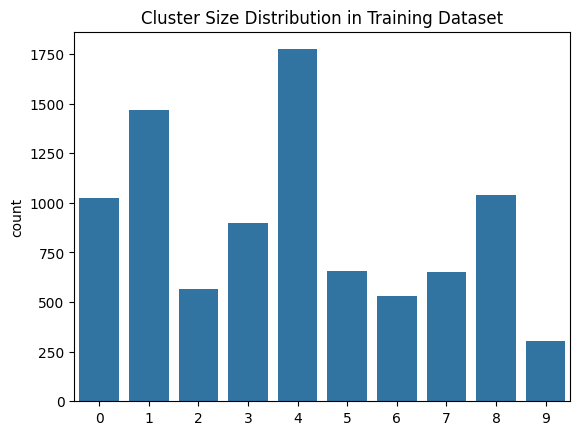

In [126]:
# Cluster Size Distribution

sns.countplot(x=labels, data=X_train)
plt.title('Cluster Size Distribution in Training Dataset')
plt.show()

In [127]:
# # Cluster Centroids

# plt.figure(figsize=(10, 8))
# plt.scatter(X_train[features[0]], X_train[features[1]])
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')
# plt.title('Cluster Centroids from Training Data')
# plt.xlabel(X_train.columns[0])
# plt.ylabel(X_train.columns[1])
# plt.show()

In [128]:
# # Plot the scatter plot with different colors for each cluster
# plt.figure(figsize=(10, 8))
# for cluster in range(3):
#     cluster_data_train = X_train_with_predictions[X_train_with_predictions['cluster_label'] == cluster]
#     plt.scatter(cluster_data_train[features[0]], cluster_data_train[features[1]], label=f'cluster_label {cluster + 1}')

# # Plot centroids (optional)
# # centroids_temp = scaler.transform(centroids)
# centroids_temp = centroids
# plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

# for i, centroid in enumerate(centroids_temp):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# plt.title('Cluster Centroids from Training Data')
# plt.xlabel(X_train_with_predictions.columns[0])
# plt.ylabel(X_train_with_predictions.columns[1])
# plt.legend()
# plt.show()

In [129]:
# # Plot the scatter plot with different colors for each cluster
# plt.figure(figsize=(10, 8))
# for cluster in range(3):
#     cluster_data_val = X_val_with_predictions[X_val_with_predictions['predicted_cluster_label'] == cluster]
#     plt.scatter(cluster_data_val[features[0]], cluster_data_val[features[1]], label=f'predicted_cluster_label {cluster + 1}')

# # Plot centroids (optional)
# # centroids_temp = scaler.transform(centroids)
# centroids_temp = centroids
# plt.scatter(centroids_temp[:, 0], centroids_temp[:, 1], marker='X', s=200, c='red', label='Centroids')

# for i, centroid in enumerate(centroids_temp):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# plt.title('Cluster Centroids from Validation Data')
# plt.xlabel(X_val_with_predictions.columns[0])
# plt.ylabel(X_val_with_predictions.columns[1])
# plt.legend()
# plt.show()

In [130]:
# plt.figure(figsize=(10, 8))

# # Scatter plot of data points
# plt.scatter(X_train[features[0]], X_train[features[1]])

# # Scatter plot of cluster centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')

# # Plot circles around centroids
# for i, centroid in enumerate(centroids):
#     circle = plt.Circle((centroid[0], centroid[1]), radius=10, edgecolor='black', facecolor='none', linestyle='dashed')
#     plt.gca().add_patch(circle)
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='center', va='center')

# plt.title('Clusters with Circles around Centroids')
# plt.xlim(0, max(X_train[features[0]]) + (max(X_train[features[0]])*0.1))
# plt.legend()
# plt.show()

In [131]:
# # Davies-Bouldin Index is the ratio of mean inter-cluster variance to mean intra-cluster variance

# # Calculate Davies-Bouldin Index
# db_index_train = metrics.davies_bouldin_score(X_train, labels)

# # Plot the data and cluster centers
# # scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = [plt.cm.viridis(i) for i in labels], cmap='viridis', edgecolors='k', alpha=0.7)
# scatter = plt.scatter(X_train[features[0]], X_train[features[1]], c = labels, cmap='viridis', edgecolors='k', alpha=0.7)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# # Add colorbar for better interpretation of Davies-Bouldin Index values
# cbar = plt.colorbar(scatter)
# cbar.set_label('Cluster Label')

# plt.title(f'Davies-Bouldin Index for Training Data: {db_index_train:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
# plt.legend()
# plt.show()

In [132]:
# # Calculate Davies-Bouldin Index
# db_index_val = metrics.davies_bouldin_score(X_val, y_pred)

# # Plot the data and cluster centers
# # plt.scatter(X_val[features[0]], X_val[features[1]], c = [plt.cm.viridis(i) for i in y_pred], cmap='viridis', edgecolors='k', alpha=0.7)
# scatter = plt.scatter(X_val[features[0]], X_val[features[1]], c = y_pred, cmap='viridis', edgecolors='k', alpha=0.7)
# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# # Add colorbar for better interpretation of Davies-Bouldin Index values
# cbar = plt.colorbar(scatter)
# cbar.set_label('Predicted Cluster Label')

# plt.title(f'Davies-Bouldin Index for Validation Data: {db_index_val:.4f}')
# plt.xlabel(X_val.columns[0])
# plt.ylabel(X_val.columns[1])
# plt.legend()
# plt.show()

In [133]:
# It Provides a measure of how well-separated clusters are in the data with the score ranging from -1 to 1
silhouette_score_value1 = silhouette_score(X_train, labels)
print("Silhouette Score for Training Data:", silhouette_score_value1)

silhouette_score_value2 = silhouette_score(X_val, y_pred)
print("Silhouette Score for Validation Data:", silhouette_score_value2)

Silhouette Score for Training Data: 0.6426705596333904
Silhouette Score for Validation Data: 0.6258346043176322


<ipython-input-134-6c07dd74b531>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))


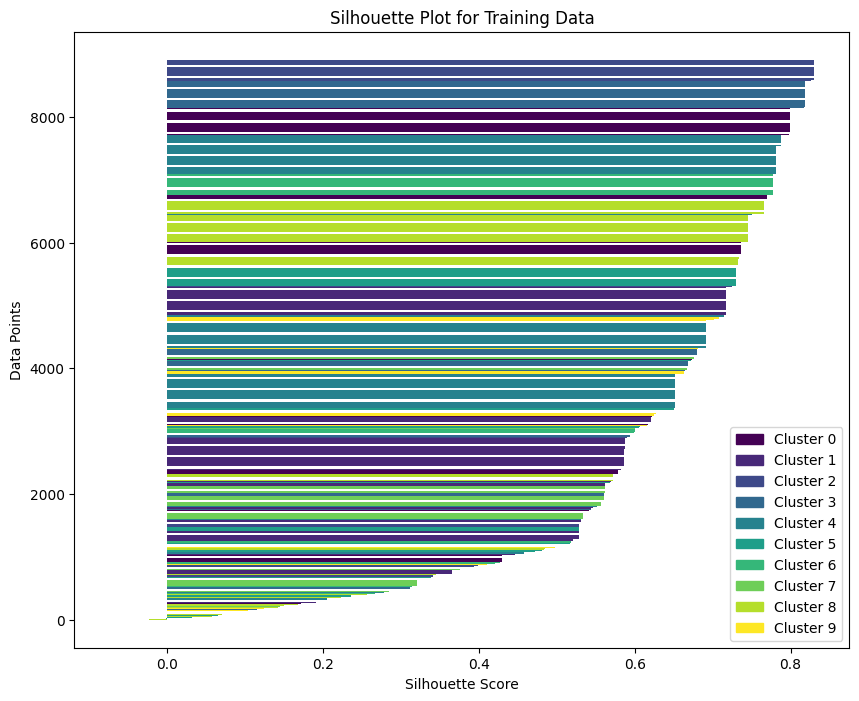

In [134]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels)))

silhouette_train_vals = silhouette_samples(X_train, labels)
sorted_idx = np.argsort(silhouette_train_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_train)), silhouette_train_vals[sorted_idx], color=colors(labels[sorted_idx]))

# # Annotate each bar with its cluster label
# for bar, label in zip(bars, labels[sorted_idx]):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(label), va='center', ha='left')

# Create legend based on unique cluster labels
unique_labels = np.unique(labels)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Training Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

<ipython-input-135-f7181de7db1c>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))


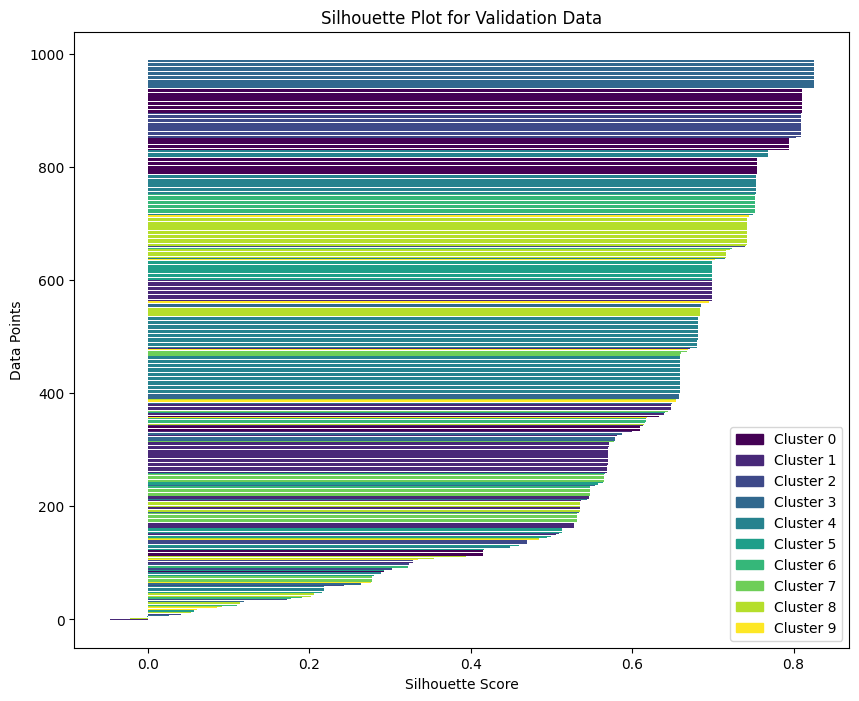

In [135]:
plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))

silhouette_val_vals = silhouette_samples(X_val, y_pred)
sorted_idx = np.argsort(silhouette_val_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_val)), silhouette_val_vals[sorted_idx], color=colors(y_pred[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(y_pred)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Validation Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

In [136]:
# # Parallel Coordinates Plot

# df_centroids = pd.DataFrame(centroids, columns=features)
# df_centroids['cluster_label'] = range(len(centroids))

# plt.figure(figsize=(10, 6))

# # Use a color map for different clusters
# cmap = plt.cm.get_cmap('viridis', len(df_centroids['cluster_label'].unique()))

# # Plot the parallel coordinates
# # parallel_coordinates(df_centroids, 'cluster_label', color='red')
# parallel_coordinates(df_centroids, 'cluster_label', color=[cmap(cluster) for cluster in df_centroids['cluster_label']], alpha=0.7)
# plt.title('Cluster Centroids (Parallel Coordinates)')

# # Rotate x-axis labels by 90 degrees
# plt.xticks(rotation=90)
# plt.show()

# **Performance Evaluation with Labelled Validation Data**

In [137]:
X_test = X_val
X_test.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,sTos,dTos,...,SrcRate,DstRate,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
8432,455246.906287,265.659442,4.780376,4.212715,3.007824,4.366963,4.793196,2.944966,0.0,0.0,...,1.771186,1.346425,64256.0,65024.0,5.028190e+08,7.974013e+08,0.560520,0.367769,0.034546,2.250580e+05
5680,636903.010804,25257.663842,0.253301,0.285364,0.293151,0.190814,0.266477,0.281532,0.0,0.0,...,33.262600,38.289493,56704.0,64896.0,2.542816e+09,3.847444e+09,0.017184,0.001470,0.017491,2.087644e+06
4767,636913.763158,25267.499520,0.177227,0.177840,0.177977,0.177295,0.181568,0.178558,0.0,0.0,...,34.998405,50.872519,56704.0,64896.0,1.947928e+09,4.287946e+09,0.022420,0.001604,0.019408,3.769031e+05
9218,660539.880742,1962.659257,2.040534,1.933205,2.045966,1.909115,2.005403,2.013842,0.0,0.0,...,1.750682,2.250765,64128.0,65024.0,3.522979e+09,7.687038e+08,0.014926,0.001640,0.013470,1.276085e+06
621,726791.000000,61.000000,4.999586,4.999586,4.999586,4.999586,4.999586,4.999586,0.0,0.0,...,4.000331,3.000248,91648.0,68608.0,5.433417e+08,3.940738e+09,0.138367,0.105134,0.033233,3.117260e+05


In [138]:
y_test = y_val

# Assuming labels_true contains the true labels for your test set
labels_true = y_test
labels_true

8432    2
5680    1
4767    1
9218    2
621     2
       ..
8640    2
9155    2
594     2
5563    1
3434    1
Name: slice Type, Length: 990, dtype: int64

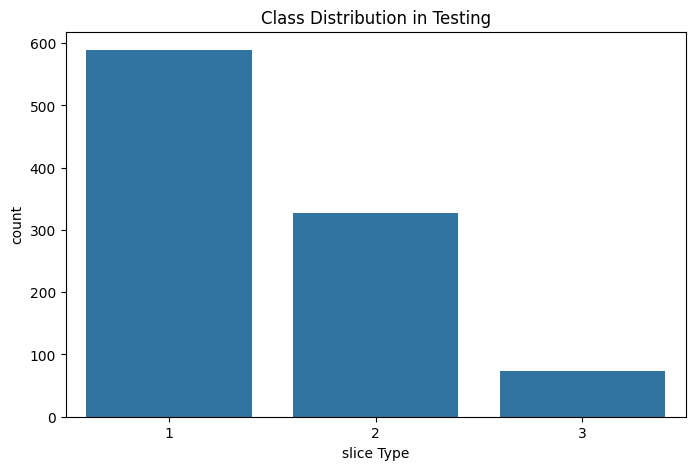

In [139]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test)
plt.title('Class Distribution in Testing')
plt.show()

In [140]:
# Predict cluster labels for the test set
labels_test = kmeans_model.predict(X_test)
labels_test

array([3, 4, 4, 9, 1, 2, 9, 3, 1, 3, 1, 8, 7, 3, 1, 0, 1, 5, 4, 6, 3, 2,
       1, 8, 5, 4, 4, 8, 8, 3, 8, 1, 1, 0, 1, 9, 4, 4, 4, 4, 0, 4, 8, 8,
       4, 4, 4, 3, 7, 0, 8, 1, 1, 6, 7, 6, 3, 0, 0, 0, 1, 7, 1, 8, 1, 4,
       2, 1, 0, 8, 1, 3, 7, 3, 0, 4, 4, 5, 4, 2, 7, 4, 1, 8, 0, 3, 5, 4,
       6, 1, 0, 0, 0, 2, 4, 7, 1, 0, 3, 0, 8, 8, 5, 0, 2, 4, 8, 8, 4, 0,
       0, 8, 1, 3, 7, 2, 3, 1, 7, 6, 4, 1, 0, 8, 8, 5, 7, 3, 0, 0, 4, 0,
       0, 1, 2, 4, 3, 4, 5, 5, 1, 9, 0, 8, 4, 4, 4, 5, 3, 4, 0, 2, 8, 3,
       8, 4, 3, 1, 3, 8, 8, 0, 9, 4, 7, 7, 4, 1, 8, 2, 8, 5, 0, 4, 0, 0,
       5, 0, 8, 0, 8, 8, 9, 8, 9, 6, 1, 1, 8, 0, 7, 8, 3, 4, 0, 0, 4, 6,
       0, 2, 0, 4, 8, 5, 2, 4, 6, 4, 3, 0, 1, 4, 4, 3, 3, 7, 3, 2, 1, 4,
       2, 2, 8, 0, 0, 1, 8, 5, 1, 3, 3, 8, 4, 1, 3, 0, 7, 1, 8, 1, 7, 6,
       1, 0, 8, 8, 3, 0, 1, 6, 4, 4, 2, 4, 5, 8, 0, 1, 8, 5, 8, 5, 2, 0,
       1, 1, 7, 8, 4, 4, 5, 5, 1, 4, 4, 8, 4, 8, 8, 7, 0, 8, 0, 4, 5, 5,
       8, 8, 3, 1, 1, 1, 4, 1, 8, 9, 4, 4, 0, 0, 8,

In [141]:
np.unique(labels_true)

array([1, 2, 3])

In [142]:
np.unique(labels_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [143]:
# Aligning the Predicted Labels as per True Labels to avoid confusion

aligned_labels_test = labels_test + 1
aligned_labels_test

array([ 4,  5,  5, 10,  2,  3, 10,  4,  2,  4,  2,  9,  8,  4,  2,  1,  2,
        6,  5,  7,  4,  3,  2,  9,  6,  5,  5,  9,  9,  4,  9,  2,  2,  1,
        2, 10,  5,  5,  5,  5,  1,  5,  9,  9,  5,  5,  5,  4,  8,  1,  9,
        2,  2,  7,  8,  7,  4,  1,  1,  1,  2,  8,  2,  9,  2,  5,  3,  2,
        1,  9,  2,  4,  8,  4,  1,  5,  5,  6,  5,  3,  8,  5,  2,  9,  1,
        4,  6,  5,  7,  2,  1,  1,  1,  3,  5,  8,  2,  1,  4,  1,  9,  9,
        6,  1,  3,  5,  9,  9,  5,  1,  1,  9,  2,  4,  8,  3,  4,  2,  8,
        7,  5,  2,  1,  9,  9,  6,  8,  4,  1,  1,  5,  1,  1,  2,  3,  5,
        4,  5,  6,  6,  2, 10,  1,  9,  5,  5,  5,  6,  4,  5,  1,  3,  9,
        4,  9,  5,  4,  2,  4,  9,  9,  1, 10,  5,  8,  8,  5,  2,  9,  3,
        9,  6,  1,  5,  1,  1,  6,  1,  9,  1,  9,  9, 10,  9, 10,  7,  2,
        2,  9,  1,  8,  9,  4,  5,  1,  1,  5,  7,  1,  3,  1,  5,  9,  6,
        3,  5,  7,  5,  4,  1,  2,  5,  5,  4,  4,  8,  4,  3,  2,  5,  3,
        3,  9,  1,  1,  2

In [144]:
np.unique(aligned_labels_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32)

In [145]:
# # Calculate Davies-Bouldin Index
# db_index_test = metrics.davies_bouldin_score(X_test, labels_test)

# # Plot the data and cluster centers
# # plt.scatter(X_test[features[0]], X_test[features[1]], c = [plt.cm.viridis(i) for i in labels_test], cmap='viridis', edgecolors='k', alpha=0.7)
# scatter = plt.scatter(X_test[features[0]], X_test[features[1]], c = labels_test, cmap='viridis', edgecolors='k', alpha=0.7)

# plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# # Add colorbar for better interpretation of Davies-Bouldin Index values
# cbar = plt.colorbar(scatter)
# cbar.set_label('Predicted Cluster Label')

# plt.title(f'Davies-Bouldin Index for Testing Data: {db_index_test:.4f}')
# plt.xlabel(X_test.columns[0])
# plt.ylabel(X_test.columns[1])
# plt.legend()
# plt.show()

In [146]:
# # Original vs. Predicted Labels

# plt.figure(figsize=(10, 8))

# # sns.scatterplot(x=features[0], y=features[1], hue='slice Type', data=test_data)
# sns.scatterplot(x=features[0], y=features[1], hue=labels_true, data=test_data, palette='Set1', s=200)
# sns.scatterplot(x=features[0], y=features[1], hue=aligned_labels_test, data=test_data, palette='Set1', s=200, marker='x')

# plt.scatter(X_train[features[0]], X_train[features[1]], s=20, c='black')
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')

# for i, centroid in enumerate(centroids):
#     plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='red', fontsize=12, ha='left', va='top')

# plt.title('Original vs. Predicted Labels in Testing Dataset')
# plt.legend()
# plt.show()

In [147]:
# silhouette_test_score_value = silhouette_score(X_test, aligned_labels_test)
# print("Silhouette Score for Testing Data:", silhouette_test_score_value)

<ipython-input-148-abeeb70ec0e6>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))


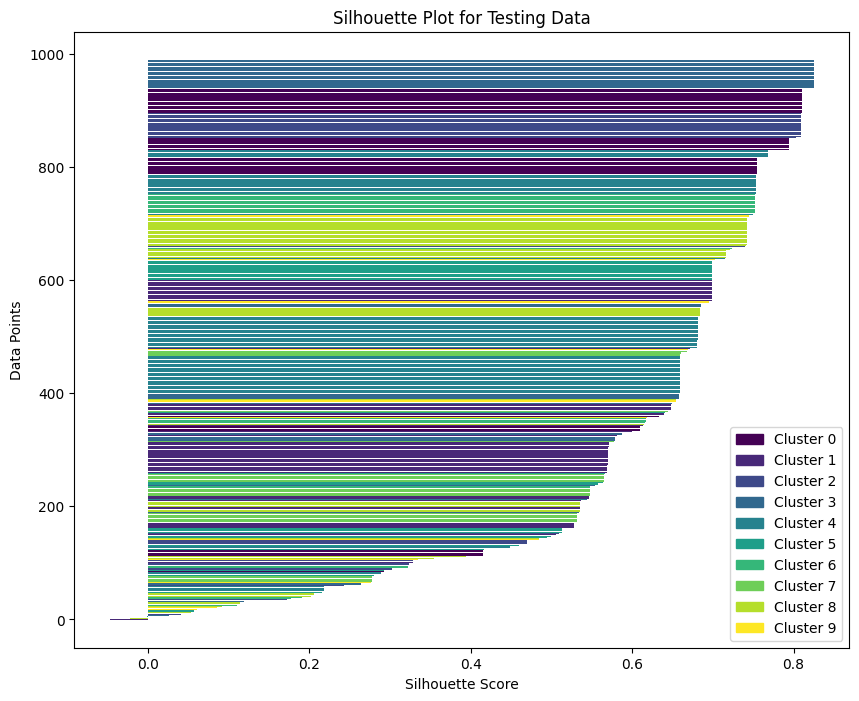

In [148]:
# Silhouette Plots

plt.figure(figsize=(10, 8))

# Create a color map with a unique color for each cluster
colors = plt.cm.get_cmap('viridis', len(np.unique(labels_test)))

silhouette_test_vals = silhouette_samples(X_test, labels_test)
sorted_idx = np.argsort(silhouette_test_vals)

# Plot the silhouette bars
bars = plt.barh(range(len(X_test)), silhouette_test_vals[sorted_idx], color=colors(labels_test[sorted_idx]))

# Create legend based on unique cluster labels
unique_labels = np.unique(labels_test)
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(label)) for label in unique_labels]
plt.legend(legend_handles, [f'Cluster {label}' for label in unique_labels], loc='lower right')

plt.title('Silhouette Plot for Testing Data')
plt.xlabel('Silhouette Score')
plt.ylabel('Data Points')
plt.show()

In [149]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ari = adjusted_rand_score(labels_true, aligned_labels_test)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ari)

Adjusted Rand Index for Testing(Labelled) Data: 0.05846157828585135


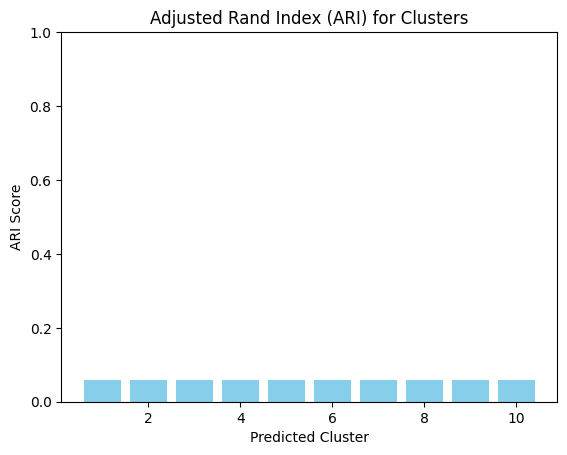

In [150]:
# Visualize ARI
# plt.figure(figsize=(8, 4))
plt.bar((np.unique(aligned_labels_test)), [ari], color=['skyblue'])
plt.ylim(0, 1)  # ARI ranges from 0 to 1
plt.title('Adjusted Rand Index (ARI) for Clusters')
plt.xlabel('Predicted Cluster')
plt.ylabel('ARI Score')
plt.show()

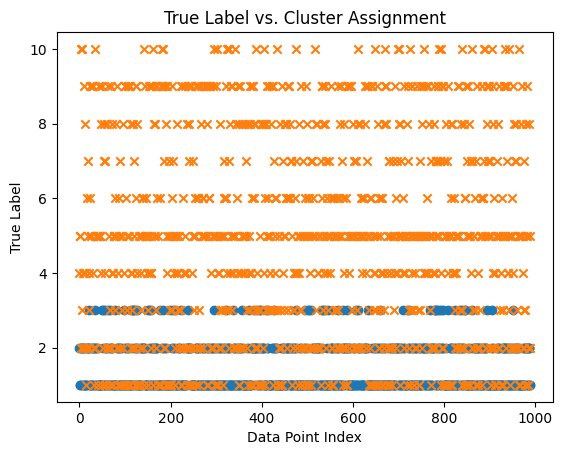

In [151]:
#  Individual Data Point Comparison

# plt.scatter(range(len(labels_true)), labels_true, c=labels_test, cmap='viridis')
plt.scatter(range(len(labels_true)), labels_true, marker='o', label='True Label')
plt.scatter(range(len(labels_test)), aligned_labels_test, marker='x', label='Cluster Assignment')

plt.title('True Label vs. Cluster Assignment')
plt.xlabel('Data Point Index')
plt.ylabel('True Label')
plt.show()

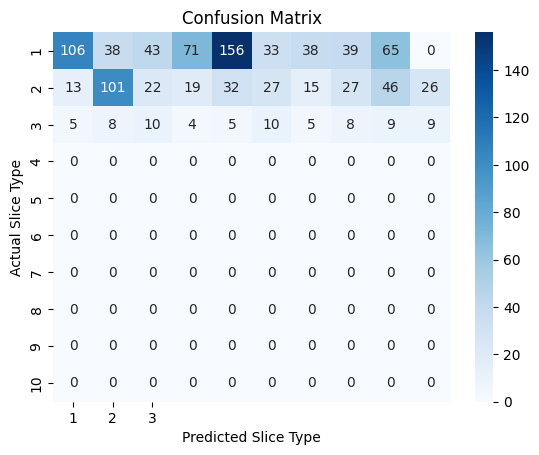

In [152]:
# Confusion Matrix

cm = confusion_matrix(labels_true, aligned_labels_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(labels_true), yticklabels=np.unique(aligned_labels_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()

In [153]:
# Calculate accuracy
print("Accuracy", accuracy_score(labels_true, aligned_labels_test))

# Calculate precision
print("Precision", precision_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate recall
print("Recall", recall_score(labels_true, aligned_labels_test, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(labels_true, aligned_labels_test, average='weighted'))

Accuracy 0.2191919191919192
Precision 0.7460544217687075
Recall 0.2191919191919192
F1-score 0.3277592075120679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **SYNC NOTEBOOKS**

In [58]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp12 - Slice_Identification_UnSupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'